#  保存提取神经网络

In [1]:
import torch
import matplotlib.pyplot as plt
from torch.autograd import Variable
# 提供数据
x=torch.unsqueeze(torch.linspace(-1,1,100),dim=1)
y=x.pow(2)+0.2*torch.rand(x.size())
x,y=Variable(x,requires_grad=False),Variable(y,requires_grad=False)

def save():
    # 利用快速搭建构建一个regression神经网络模型
    net1=torch.nn.Sequential(
        torch.nn.Linear(1,10),
        torch.nn.ReLU(),
        torch.nn.Linear(10,1)
    )
    optimizer=torch.optim.SGD(net1.parameters(),lr=0.5)
    loss_func=torch.nn.MSELoss()
    
    for t in range(100):
        prediction=net1(x)
        loss=loss_func(prediction,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # 这里用torch的save方法就能保存神经网络
    torch.save(net1,'net.pkl')  # 保存整个神经网络到本地的.pkl的文件中
    torch.save(net1.state_dict(),'net_params.pkl')  # 只保存训练的参数到本地的.pkl的文件中
    # 画图
    plt.figure(1,figsize=(10,3))
    plt.subplot(131)
    plt.title('Net1')
    plt.scatter(x.data.numpy(),y.data.numpy())
    plt.plot(x.data.numpy(),prediction.data.numpy(),'r-',lw=5)

def restore_net():
    # 使用torch.load方法读取保存的神经网络
    net2=torch.load('net.pkl')
    prediction=net2(x)
    plt.figure(1,figsize=(10,3))
    plt.subplot(131)
    plt.title('Net2')
    plt.scatter(x.data.numpy(),y.data.numpy())
    plt.plot(x.data.numpy(),prediction.data.numpy(),'r-',lw=5)
    
def restore_params():
    net3=torch.nn.Sequential(
        torch.nn.Linear(1,10),
        torch.nn.ReLU(),
        torch.nn.Linear(10,1)
    )
    # 读取保留了参数的神经网络
    net3.load_state_dict(torch.load('net_params.pkl'))  # 注意写法,这里读取神经网络的参数,再用当前神经网络的load_state_dict
                                                        #来读取刚刚读取的参数
    prediction=net3(x)
    plt.figure(1,figsize=(10,3))
    plt.subplot(131)
    plt.title('Net3')
    plt.scatter(x.data.numpy(),y.data.numpy())
    plt.plot(x.data.numpy(),prediction.data.numpy(),'r-',lw=5)

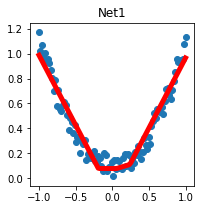

In [2]:
save()

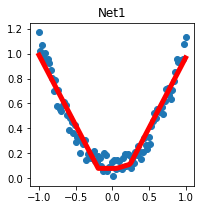

In [3]:
restore_net()

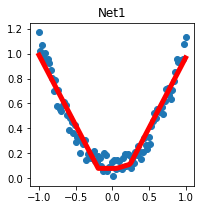

In [4]:
restore_params()